# Теория вероятностей и математическая статистика

## Урок 3

## Основы математической статистики. Количественные характеристики популяции. Графическое представление данных

### Разбор домашнего задания

__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.

__Решение__

In [ ]:
samples = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [ ]:
def mean(l: list) -> float:
    """Среднее арифметическое.
    """
    
    return sum(l) / len(l)

In [ ]:
mean(samples)

73.14285714285714

In [ ]:
import numpy as np

In [ ]:
np.mean(samples)

73.14285714285714

In [ ]:
def variance(l: list, unbiased: bool = True) -> float:
    """Выборочная дисперсия.
    """
    
    mean_ = mean(l)
    n = len(l)
    l = map(lambda x: (x - mean_) ** 2, l)
    
    return sum(l) / (n - int(unbiased))

In [ ]:
variance(samples)

2241.8285714285716

In [ ]:
np.var(samples, ddof=1)

2241.828571428571

In [ ]:
def std(l: list, unbiased: bool = True) -> float:
    """Выборочное среднее квадратическое отклонение.
    """
    
    return variance(l, unbiased) ** 0.5

In [ ]:
std(samples)

47.34795213553139

In [ ]:
np.std(samples, ddof=1)

47.347952135531386

__Задача 2__

Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении "усов" в `boxplot`, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.

__Решение__

В основе процедуры построения боксплотов лежит вычисление квантилей, поэтому сразу разберёмся с этим.

Квантиль порядка $\alpha$ — это такое значение $a$, что хотя бы $\alpha \%$ значений выборки меньше, либо равны $a$ (и, соответственно, хотя бы $(1 - \alpha) \%$ значений выборки больше, либо равны $a$).

In [ ]:
def quantile(l: list, order: float) -> float:
    """Квантиль порядка `order` по списку `l`.
    """
    
    l = sorted(l)
    n = len(l)
    
    n_left_elements = int(n * order)
    n_right_elements = int(n * (1 - order))
    
    print(n, n_left_elements, n_right_elements)
    
    if n_left_elements + n_right_elements == n:
        return (l[n_left_elements - 1] + l[n_left_elements]) / 2
    
    else:
        assert n_left_elements + n_right_elements == n - 1
        
        return l[n_left_elements]
    
    
def median(l: list) -> float:
    """Медиана выборки.
    """
    
    return quantile(l, 0.5)

Медиана — квантиль порядка $0.5$:

In [ ]:
median(samples)

21 10 10


70

In [ ]:
np.median(samples)

70.0

Первый квартиль — это квантиль порядка $0.25$:

In [ ]:
q1 = quantile(samples, 0.25)
q1

21 5 15


45

In [ ]:
np.quantile(samples, 0.25)

45.0

Аналогично, третий квартиль — кванииль порядка $0.75$:

In [ ]:
q3 = quantile(samples, 0.75)
q3

21 15 5


84

In [ ]:
np.quantile(samples, 0.75)

84.0

In [ ]:
iqd = q3 - q1
iqd

39

In [ ]:
boxplot_range = (q1 - 1.5 * iqd, q3 + 1.5 * iqd)
boxplot_range

(-13.5, 142.5)

In [ ]:
outliers = list(filter(lambda x: not (boxplot_range[0] <= x <= boxplot_range[1]), samples))
outliers

[230, 150]

In [ ]:
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']

<AxesSubplot:>

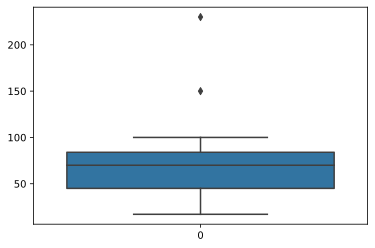

In [ ]:
sns.boxplot(data=samples)

__Задача 3__

В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
1. студент учится на факультете A,
2. студент учится на факультете B,
3. студент учится на факультете C?

_Замечание_: да, эта задача не на тему статистики, но тема важная, и её стоит иногда освежать в памяти.

__Решение__

Пусть $A$, $B$, $C$ — события, заключающиеся в том, что случайным образом взятый студент учится, соответственно, на факультете $A$, $B$ или $C$. Кроме того, пусть событие $S$ обозначает, что случайным образом взятый студент сдал первую сессию. Для решения задачи нам нужно посчитать условные вероятности
$$P(A|S), \: P(B|S), \: P(C|S)$$
и выбрать тот факультет, которому соответствует наибольшая вероятность. Данные вероятности можно посчитать с помощью формулы Байеса. Например, для факультета $A$:
$$P(A | S) = \dfrac{P(S | A) \cdot P(A)}{P(S)}$$

Сперва оценим вероятности $P(A)$, $P(B)$, $P(C)$. Поскольку мы знаем, сколько на каждом факультете студентов, мы можем оценить вероятности этих событий. (Заметим, что всего студентов 235.)
$$P(A) = \dfrac{100}{235} = 0.4255, \: P(B) = \dfrac{90}{235} = 0.383, \: P(C) = \dfrac{45}{235} = 0.1915$$

In [ ]:
a = 100
b = 90
c = 45

p_a = a / (a + b + c)
p_b = b / (a + b + c)
p_c = c / (a + b + c)

p_a, p_b, p_c

(0.425531914893617, 0.3829787234042553, 0.19148936170212766)

Далее, по условию задачи нам даны вероятности:
$$P(S | A) = 0.6, \: P(S | B) = 0.7, \: P(S | C) = 0.8$$

In [ ]:
p_sa = 0.5
p_sb = 0.6
p_sc = 0.7

Для того, чтобы посчитать вероятность $P(S)$, нам понадобится формула полной вероятности. Имеем:
$$P(S) = P(S | A) \cdot P(A) + P(S | B) \cdot P(B) + P(S | C) \cdot P(C) = 0.5766$$

In [ ]:
p_s = p_sa * p_a + p_sb * p_b + p_sc * p_c
p_s

0.5765957446808511

Теперь всё готово, чтобы применить формулу Байеса для каждого факультета:

In [ ]:
p_as = p_sa * p_a / p_s
p_bs = p_sb * p_b / p_s
p_cs = p_sc * p_c / p_s

p_as, p_bs, p_cs

(0.36900369003690037, 0.3985239852398524, 0.23247232472324722)

Как мы видим, наиболее вероятно, что данный студент учится на факультете $B$.